**Groupe 7  3IIR**

**Equipe Numero 4**

**Membres d'equipe :**

*AIT ALI YASSIR /*
*ELHARCHI MOHAMMED AMINE /*
*OUHADI MOHAMED YACINE /*
*ELKIHEL SALAH-EDDINE /*
*EL KHANTOURI BILAL*

In [12]:
#importing matplotlib
import matplotlib.pyplot as plt

**IMPORTING THE DATASET**

In [11]:
import pandas as pd
df = pd.read_csv('amazon.csv')

**The top 5 categories**

Top 5 Categories based on the rating:
rating
13+    2117
16+    1547
ALL    1268
18+    1243
R      1010
Name: count, dtype: int64


Visualizing the top 5 categories based on the rating using bar graph:


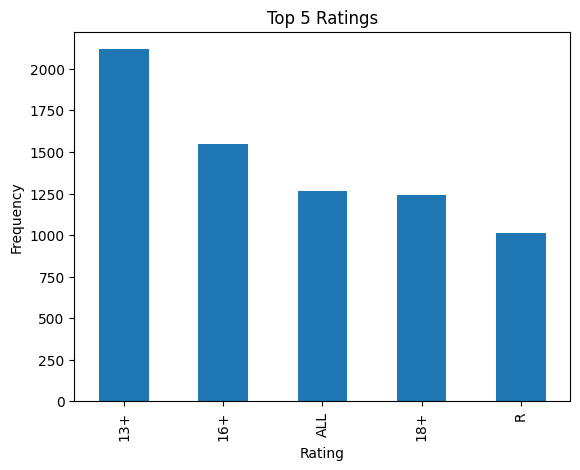

In [68]:
top_five_categories = df['rating'].value_counts().head(5)
print("Top 5 Categories based on the rating:")
print(top_five_categories)

#visualizing the top 5 categories based on the rating using bar graph

print("\n\nVisualizing the top 5 categories based on the rating using bar graph:")
top_five_categories.plot(kind='bar', title='Top 5 Ratings', xlabel='Rating', ylabel='Frequency')
plt.show()

**Top 5 Directors**

Top 5 Directors:
director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


Visualizing the top 5 directors using bar graph:


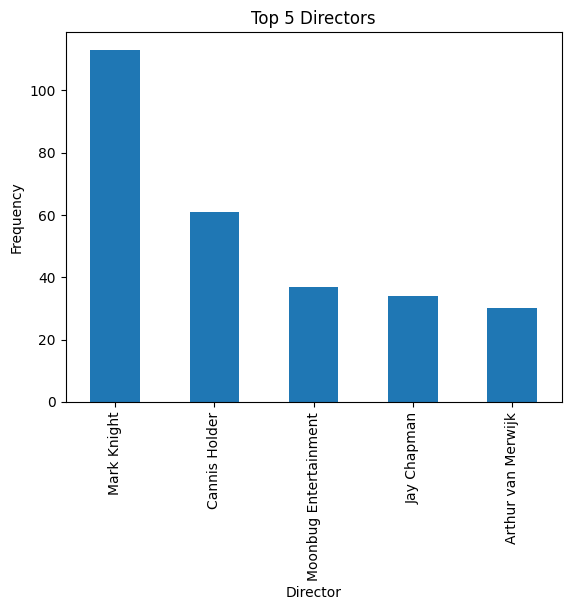

In [69]:
top_directors = df['director'].value_counts().head(5)
print("Top 5 Directors:")
print(top_directors)

#visualizing the top 5 directors using bar graph
print("\n\nVisualizing the top 5 directors using bar graph:")
top_directors.plot(kind='bar', title='Top 5 Directors', xlabel='Director', ylabel='Frequency')
plt.show()

**Top 10 Actors**

Top 10 Actors:
cast
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
Gallagher                            9
LB, Aaron Michael                    9
Eddie Izzard                         9
Name: count, dtype: int64


Visualization of top 10 actors using bar graph:


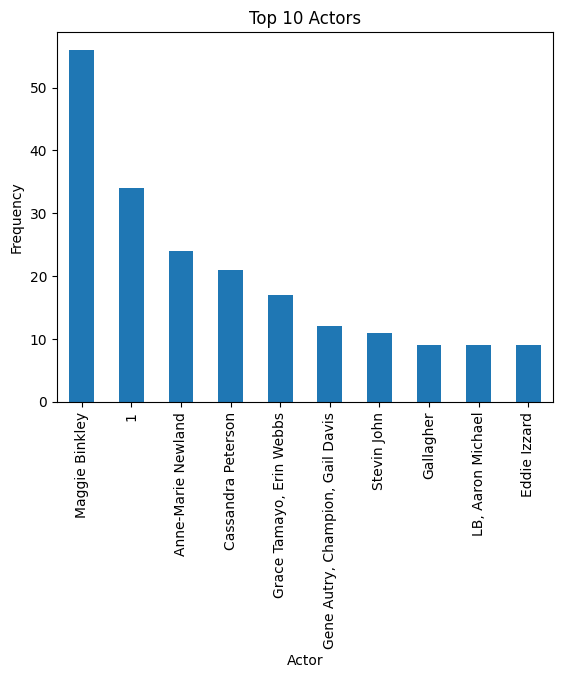

In [70]:
top_ten_actors = df['cast'].value_counts().head(10)
print("Top 10 Actors:")
print(top_ten_actors)

# Visualization of top 10 actors using bar graph
print("\n\nVisualization of top 10 actors using bar graph:")
top_ten_actors.plot(kind='bar', title='Top 10 Actors', xlabel='Actor', ylabel='Frequency')
plt.show()

**Top 5 TV Shows with Most Seasons**

Top 5 TV Shows with Most Seasons:
             title   duration
800      Teen Wolf  9 Seasons
185        Vikings  9 Seasons
1081        Scrubs  9 Seasons
3571  'Allo 'Allo!  9 Seasons
867          Suits  9 Seasons


Visualizing the top 5 TV Shows with most seasons using bar graph:


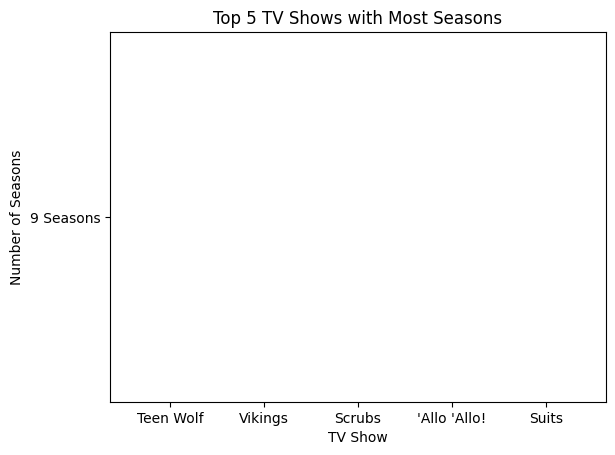

In [72]:
tv_shows_seasons = df[df['type'] == 'TV Show']
top_tv_shows_seasons = tv_shows_seasons.sort_values(by='duration', ascending=False).head(5)
print("Top 5 TV Shows with Most Seasons:")
print(top_tv_shows_seasons[['title', 'duration']])

#visualizing the top 5 TV Shows with most seasons using bar graph
print("\n\nVisualizing the top 5 TV Shows with most seasons using bar graph:")
plt.bar(top_tv_shows_seasons['title'], top_tv_shows_seasons['duration'], color='black')
plt.xlabel('TV Show')
plt.ylabel('Number of Seasons')
plt.title('Top 5 TV Shows with Most Seasons')
plt.show()

**Identifying similar content by matching text features**

**IMPORTING SCIKIT-LEARN**

In [82]:
%pip install scikit-learn

  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl (10.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
df = pd.read_csv('amazon.csv')
# Vectorize descriptions
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["listed_in"])

# Function to find similar movies
def find_similar(title):
    query_index = df[df['title'] == title].index[0]
    query_tfidf = tfidf_matrix[query_index]
    similarities = cosine_similarity(query_tfidf, tfidf_matrix)[0]  
    similar_indices = similarities.argsort()[-5:][::-1]  # Top 5 excluding itself
    return df['title'].iloc[similar_indices]

similar_to_movie = find_similar("The Grand Seduction")
print(similar_to_movie)


0              The Grand Seduction
9176    It's a Wonderful Afterlife
7403              Hi Porgi Kunachi
7391                   Night Shift
3934            A Thousand Junkies
Name: title, dtype: object


**The number of TV Shows vs Movies over years**

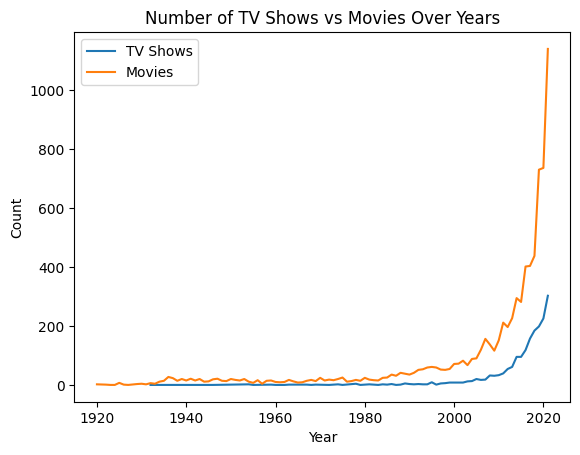

In [66]:
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()
movies_by_year = movies['release_year'].value_counts().sort_index()

#visualizing the number of TV Shows vs Movies over years using line graph
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows')
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies')
plt.title('Number of TV Shows vs Movies produced over the years')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.show()